In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import math
import gym
import numpy as np
import copy
import pandas as pd
import seaborn as sns

import dynamic_programming
import plot_price_function

In [2]:
env = gym.make('OptimalLiquidation-v0')

In [3]:
dpsolv = dynamic_programming.DynamicProgrammingSolver(env)

In [4]:
v_array, policy, delta_history = dpsolv.value_iteration()

447
(631,)


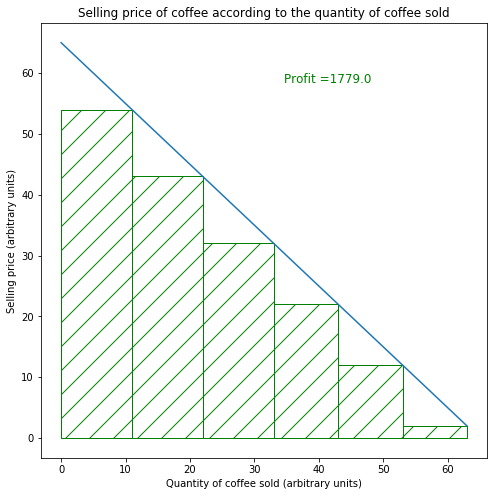

In [5]:
import plot_price_function as stephane
step = 0.1
omega_0 = 63
period = 1.5

def linear_price_function(x):
    return x+3

current_state = np.ravel_multi_index(env.start, env.shape)
print(current_state)
done = False
suite_actions = []

while not(done):
    best_action = policy[current_state]
    proba, destination, reward, done = env.P[current_state][best_action][0]

    suite_actions.append(best_action)
    current_state = destination

suite_actions = np.array([0]+suite_actions)
somme_cumulee_actions = np.cumsum(suite_actions) ## dimension T+1

subdivision_affichage = np.arange(0,omega_0+step,step)
prices=np.array([linear_price_function(omega_0-1-x) for x in subdivision_affichage])

print(subdivision_affichage.shape)

stephane.plot_price_strategy(subdivision_affichage,prices,somme_cumulee_actions)
